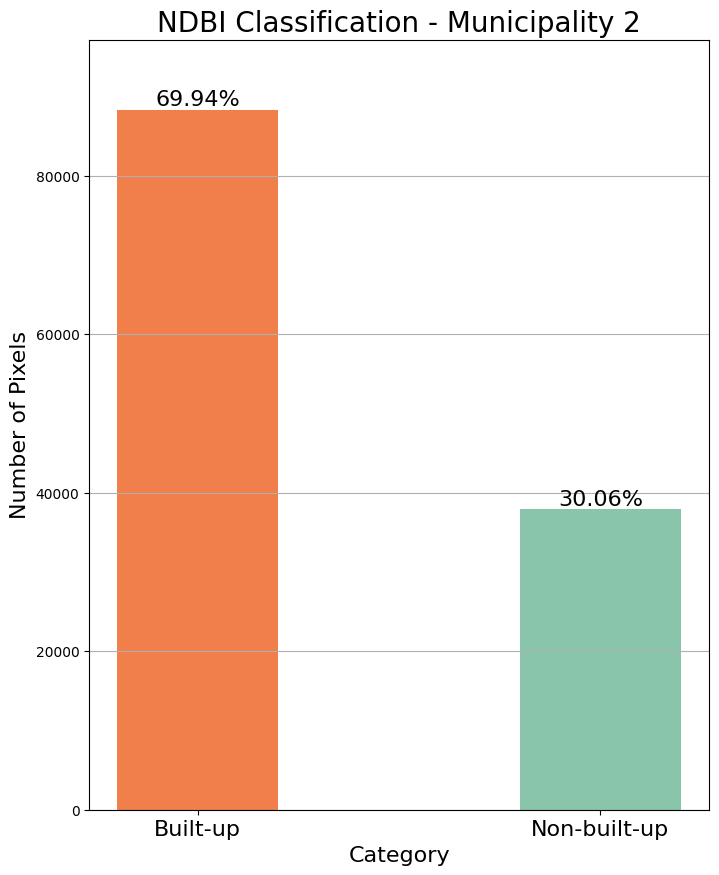

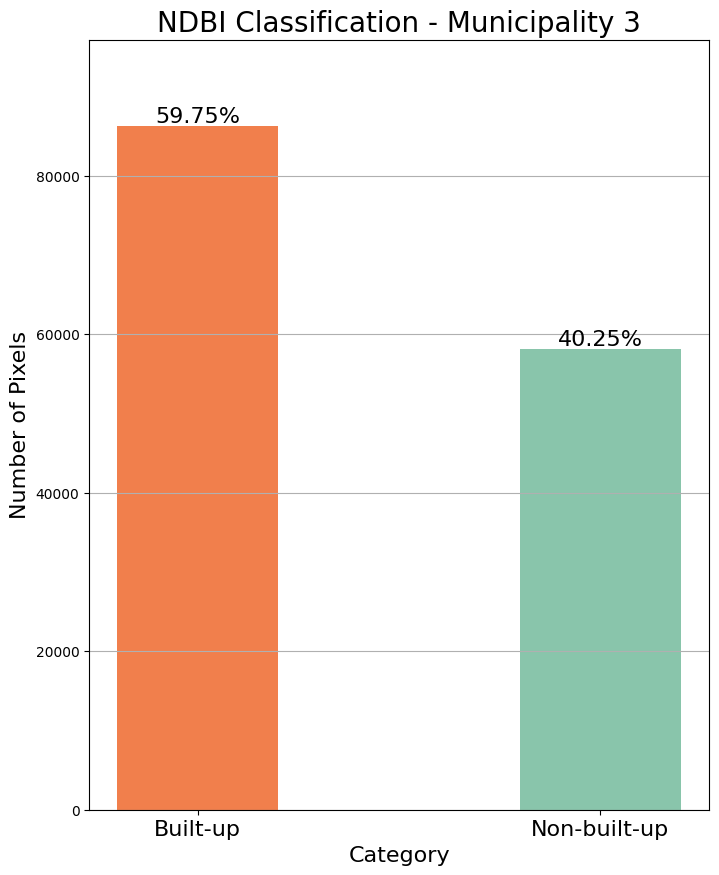

In [15]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Function to read raster data
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)  # Reading the first band
    return data

# Function to clean raster data (remove no-data values and values equal to 5)
def clean_raster(data, no_data_value=5):
    data = np.where(data == no_data_value, np.nan, data)
    data = data[np.isfinite(data)]  # Remove NaNs and infinite values
    return data

# Function to classify raster data based on a threshold
def classify_raster(data, threshold):
    built_up = np.sum(data > threshold)
    non_built_up = np.sum(data <= threshold)
    total_pixels = built_up + non_built_up
    return built_up, non_built_up, total_pixels

# Function to plot bar chart
def plot_bar_chart(built_up, non_built_up, total_pixels, title, save_path, max_y):
    categories = ['Built-up', 'Non-built-up']
    values = [built_up, non_built_up]
    percentages = [built_up / total_pixels * 100, non_built_up / total_pixels * 100]

    plt.figure(figsize=(8, 10))  # Adjusting the figure size for taller bars
    bars = plt.bar(categories, values, color=['#F17F4C', '#89C5AB'], width=0.4)  # Adjust bar width and colors

    for bar, percent in zip(bars, percentages):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percent:.2f}%', ha='center', va='bottom', fontsize=16)

    plt.title(title, fontsize=20)
    plt.xlabel('Category', fontsize=16)
    plt.ylabel('Number of Pixels', fontsize=16)
    plt.ylim(0, max_y * 1.1)  # Set the same y-axis limit for both plots
    plt.grid(axis='y')
    plt.xticks(fontsize=16)  # Adjust the font size of the x-axis labels

    plt.savefig(save_path, format='jpg')
    plt.show()

# Load and clean raster files for two different periods
raster_path1 = r'C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_a\imgs_elab\exp_ndbi_clip_municipi\ndbi_january_mun_2.tiff'
raster_path2 = r'C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_a\imgs_elab\exp_ndbi_clip_municipi\ndbi_january_mun_3.tiff'

raster1 = read_raster(raster_path1)
raster2 = read_raster(raster_path2)

cleaned_raster1 = clean_raster(raster1)
cleaned_raster2 = clean_raster(raster2)

# Define the threshold for classification
threshold = -0.1  # Example threshold, adjust as needed

# Classify the raster data
built_up1, non_built_up1, total_pixels1 = classify_raster(cleaned_raster1, threshold)
built_up2, non_built_up2, total_pixels2 = classify_raster(cleaned_raster2, threshold)

# Determine the maximum y-axis value for consistent scaling
max_y = max(built_up1 + 5, built_up1 + 5)

# Directory to save images
save_dir = r'C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_a\imgs_elab\exp_histogram_comparisons'

# Plot bar charts
plot_bar_chart(built_up1, non_built_up1, total_pixels1, 'NDBI Classification - Municipality 2', f'{save_dir}/ndbi_classification_Municipality_2.jpg', max_y)
plot_bar_chart(built_up2, non_built_up2, total_pixels2, 'NDBI Classification - Municipality 3', f'{save_dir}/ndbi_classification_Municipality_3.jpg', max_y)
